In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

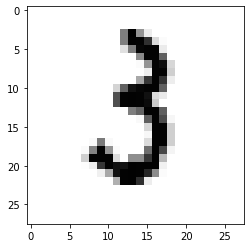

In [4]:
X = x_train[1234]
X = X.reshape(28, 28)

plt.imshow(X,  cmap='Greys')

In [6]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train = x_train/255
x_test = x_test/255

In [7]:
model = Sequential()
model.add(Conv2D(2, (2,2), padding = "same", input_shape = (28, 28, 1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(4, (2,2), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(8, (2,2), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(18, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

W1030 14:35:50.380828 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 14:35:50.448984 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1030 14:35:50.487265 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1030 14:35:50.546316 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

In [8]:
model.compile(loss="categorical_crossentropy",
             optimizer=SGD(),
             metrics=['accuracy'])

W1030 14:36:08.310513 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1030 14:36:08.322690 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 2)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 4)         36        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           136       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 72)                0         
__________

In [12]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

W1030 14:37:06.096352 17860 deprecation.py:323] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1030 14:37:06.391593 17860 deprecation_wrapper.py:119] From c:\users\pirre\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 2.2897 - acc: 0.1605
Epoch 2/10
60000/60000 [==============================] - 19s 320us/step - loss: 2.0894 - acc: 0.2832
Epoch 3/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.9723 - acc: 0.6775
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.5166 - acc: 0.8356
Epoch 5/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.3666 - acc: 0.8840
Epoch 6/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2973 - acc: 0.9060
Epoch 7/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.2576 - acc: 0.9187
Epoch 8/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2339 - acc: 0.9267
Epoch 9/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2174 - acc: 0.93162s - - ETA: 1s - loss: 0.21
Epoch 10/10
60000/60000 [==============================

In [13]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 229us/step


In [14]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.17853
測試資料的正確率: 0.9421
